### Dilation and Erosion
Dilation and erosion are known as morphological operations. They are often performed on binary images, similar to contour detection. Dilation enlarges bright, white areas in an image by adding pixels to the perceived boundaries of objects in that image. Erosion does the opposite: it removes pixels along object boundaries and shrinks the size of objects.

Often these two operations are performed in sequence to enhance important object traits!

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

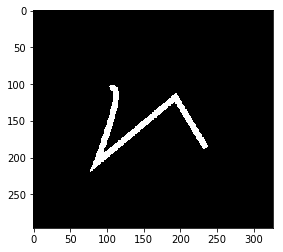

In [17]:
img = cv2.imread('images/Artboard.png')

img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

_, img_copy = cv2.threshold(img_copy, 200, 255, cv2.THRESH_BINARY)

img_copy = 255 - img_copy

plt.imshow(img_copy, cmap='gray')

### Dilation

> To dilate an image in OpenCV, you can use the dilate function and three inputs: an original binary image, a kernel that determines the size of the dilation (None will result in a default size), and a number of iterations to perform the dilation (typically = 1). In the below example, we have a 5x5 kernel of ones, which move over an image, like a filter, and turn a pixel white if any of its surrounding pixels are white in a 5x5 window!

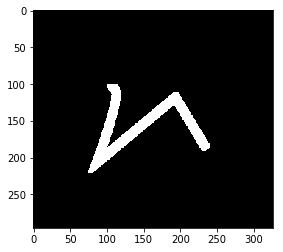

In [27]:
kernel = np.ones([5,5], np.uint8)
img_dilated = cv2.morphologyEx(img_copy, cv2.MORPH_DILATE, kernel, iterations=1)
plt.imshow(img_dilated, cmap = 'gray')

### Erosion

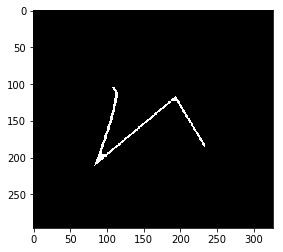

In [20]:
img_erosion = cv2.erode(img_copy, kernel, )

plt.imshow(img_erosion, cmap = 'gray')

### Opening

As mentioned, above, these operations are often combined for desired results! One such combination is called opening, which is erosion followed by dilation. This is useful in noise reduction in which erosion first gets rid of noise (and shrinks the object) then dilation enlarges the object again, but the noise will have disappeared from the previous erosion!

To implement this in OpenCV, we use the function morphologyEx with our original image, the operation we want to perform, and our kernel passed in.

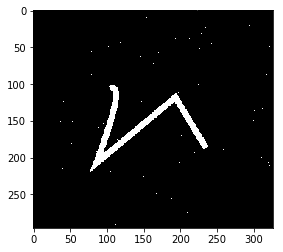

In [25]:
img_noise = np.copy(img_copy)
img_noise[np.random.randint(0,img_copy.shape[0], size=100),np.random.randint(0,img_copy.shape[1], size=100)] = 255
plt.imshow(img_noise, cmap='gray')

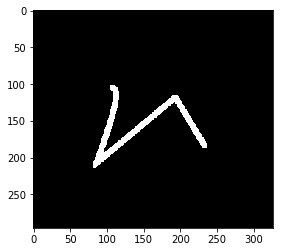

In [26]:
img_open = cv2.morphologyEx(img_noise, cv2.MORPH_OPEN, kernel)
plt.imshow(img_open, cmap='gray')

### Closing
> Closing is the reverse combination of opening; it’s dilation followed by erosion, which is useful in closing small holes or dark areas within an object.

> Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

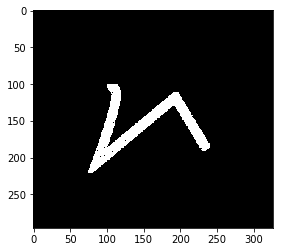

In [40]:
img_holes = np.copy(img_dilated)
img_holes[np.random.randint(0,img_copy.shape[0], size=500),np.random.randint(0,img_copy.shape[1], size=500)] = 0

plt.imshow(img_holes, cmap='gray')

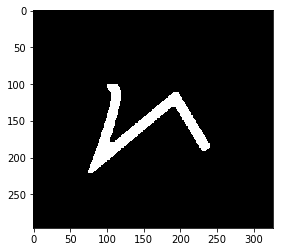

In [50]:
img_close = cv2.morphologyEx(img_holes, cv2.MORPH_CLOSE, kernel)

plt.imshow(img_close, cmap='gray')